# Module learning pathway:
- Machine Learning
    1. Supervised Learning
    ----------------------------
       1.1. Linear Regression (** TODAY: Gradient Descent **)
       1.2. Logistic Regression
       1.3. Decision Trees and Random Forests
       1.4. K-Nearest Neighbors
       1.5. Support Vector Machines
    2. Unsupervised Learning
    ----------------------------
       2.1. Clustering i.e., K-means clustering
       2.2. Dimensionality Reduction i.e., Principal Component Analysis
       2.3. Anomaly Detection 
    3. Recommender Systems
    ----------------------------
       3.1. Collaborative Filtering
       3.2. Content Based Filtering
    4. Reinforcement Learning
    ----------------------------
       4.1. Reinforcement Learning, Part 1
       4.2. Reinforcement Learning, Part 2


### Task 1. Linear Regression

###  Objectives
1. Define a Linear Regression Task
2. Make a random predictor (price_pred_rand)
3. Visualize the PDFs (price_PDF, price_pred_rand_PDF)
4. Find the dissimilarity measure of the PDFs i.e., KL Divergence(price_PDF, price_pred_rand_PDF)
5. Concept of cost function
6. Visualize the cost function 
7. Use gradient descent to minimize the cost function. 
8. Make a learned predictor (price_pred_learned)
9. Visualize the PDFs and compute KL Divergence (price_PDF, price_pred_learned_PDF, KL Divergence(price_PDF, price_pred_learned_PDF)
10. Discuss the output PDFs and KL Divergence


### Import Library

In [3]:
import pandas as pd
import numpy as np  
import seaborn as sns
from scipy.stats import entropy
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib notebook 

# Magic Command for interactive plotting within the notebook. 
# This allows you to create plots that are embedded directly in the notebook and can be zoomed, panned, and otherwise interacted with.


### Dataset Load

In [4]:
housing_dataset = pd.read_csv('../Datasets/housing.csv')

In [5]:
housing_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
housing_dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
housing_dataset = housing_dataset[['area','price']]

In [8]:
housing_dataset.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


# Standardize Dataset

In [9]:
mean = np.array(housing_dataset.mean())
std = np.array(housing_dataset.std())
print(mean)
print(std)

housing_dataset = (housing_dataset - mean)/ std
housing_dataset.head()


[   5150.5412844  4766729.24770642]
[   2170.14102251 1870439.61565739]


,area,price
0,1.045766,4.562174
1,1.755397,4.000809
2,2.216196,4.000809
3,1.082630,3.982096
4,1.045766,3.551716


# Area and Price relation

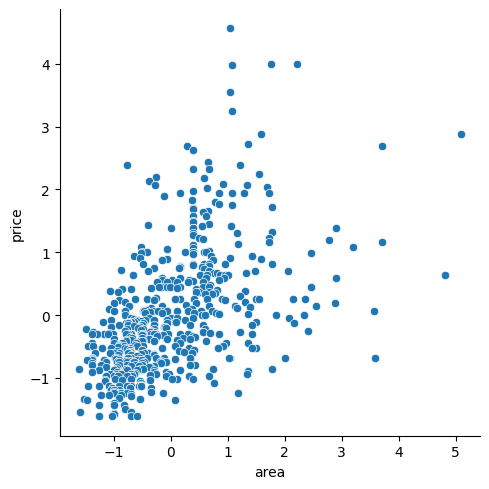

In [10]:
%matplotlib inline 
# display plots in the notebook


sns.relplot(
    data=housing_dataset,  
    x='area', 
    y='price',
)


Equation of a line: y = mx + b

m is a slop

b is bias

Lets define our problem: price = m * area + b or y   = w * x + b

w is called a weight

b is called a bias

x is an input variable

y is an output variable

w, b are parameters/ coefficient

Have to fine best  w, b to fit our data



# Random House Price Predictor

w is weight, a real number

b is a bias, a real number

w, b are called parameters.

X is feature

y_pred = X * w  + b


In [11]:
def get_house_price(x,w,b):
    y_pred =  x * w + b
    return  y_pred

In [12]:
w = np.random.randint(100,200)
b = np.random.randint(100,200)

x = housing_dataset.iloc[0]['area']
y_true =  housing_dataset.iloc[0]['price']
y_pred = get_house_price(x,w,b)

print(x, w, b,  y_true, y_pred)


1.0457655479793244 170 103 4.562173876591275 280.7801431564851


[x1, x2, x3, ..., xn] * w + b 

[x1 * w, x2 * w, ..., xn * w] + b

[x1 * w + b, x2 * w + b, ..., xn * w + b]

[y_pred1, y_pred2, ....y_predn]

In [13]:
housing_dataset["price_pred_rand"] = get_house_price(housing_dataset["area"], w, b)
housing_dataset.head()

,area,price,price_pred_rand
0,1.045766,4.562174,280.780143
1,1.755397,4.000809,401.417465
2,2.216196,4.000809,479.753388
3,1.082630,3.982096,287.047017
4,1.045766,3.551716,280.780143


# Visualize PDF: Probability Density/Distribution Function (PDF)

In [14]:
__ = housing_dataset.melt(
    value_vars=["price", "price_pred_rand"], 
    var_name="Type", 
    value_name="Price"
)

__['Price'] = __.groupby('Type')['Price'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

__.head()

,Type,Price
0,price,1.000000
1,price,0.909091
2,price,0.909091
3,price,0.906061
4,price,0.836364


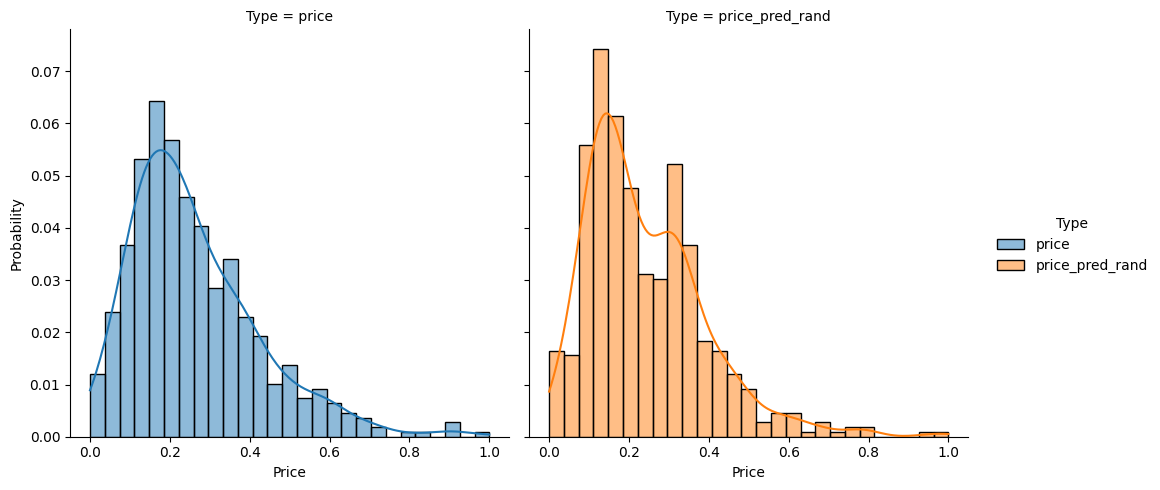

In [15]:
sns.displot(
    data=__,
    x="Price", 
    hue="Type", 
    kind="hist",
    stat='probability',
    kde=True,
    col='Type',
    fill=True,
)

# KL Divergence / Kullback-Leibler Divergence

In [16]:
price_hist, __ = np.histogram(housing_dataset['price'], bins=50, density=True)
price_pred_hist, __ = np.histogram(housing_dataset['price_pred_rand'], bins=50, density=True)
kl_divergence = entropy(price_hist + 1e-10, price_pred_hist + 1e-10)
print(f"KL Divergence is {kl_divergence}")

KL Divergence is 0.3737361385463703


- We want to maximize likelihood between true distribution and predicted distribution
- We want to minimize dissimilarity between true distribution and predicted distribution
- We want to minimize the KL Divergence between true distribution and predicted distribution
- We consider a function that would minimize the KL divergence if it itself minimizes

- This function is called cost function
- Cost function is often task specific

Today we will consider Mean Squared Error as our cost function.

y_true_1, y_pred_1, (y_true_2, y_pred_2) ^ 2

y_true_2, y_pred_2, (y_true_3, y_pred_3) ^ 2

y_true_3, y_pred_3, (y_true_4, y_pred_4) ^ 2

MSE is the average of all squared error / 2


In [17]:
def cost_function(x, y_true, w, b):
    y_pred = get_house_price(x, w, b)
    mse = np.mean((y_true - y_pred) ** 2) / 2
    return mse

X = housing_dataset['area'] 
y_true = housing_dataset['price']
y_pred = housing_dataset['price_pred_rand']
mse = cost_function(X, y_true, w, b)
print(f"MSE is {mse:0.2f}  (Random house price predictor)")

MSE is 19637.53  (Random house price predictor)


In [18]:
mse_1 = cost_function(X, y_true, w=100, b=125)
mse_2 = cost_function(X, y_true, w=142, b=145)
mse_3 = cost_function(X, y_true, w=115, b=245)
print(f"mse for w=100 and b=125 is {mse_1:0.2f}")
print(f"mse for w=142 and b=145 is {mse_2:0.2f}")
print(f"mse for w=115 and b=245 is {mse_3:0.2f}")

mse for w=100 and b=125 is 12750.32
mse for w=142 and b=145 is 20500.53
mse for w=115 and b=245 is 36551.84


In [19]:
weights = np.linspace(-10, 10, 100)
biases = np.linspace(-10, 10, 100)
weights_mesh, biases_mesh = np.meshgrid(weights, biases)
losses_mesh = []
for w in tqdm(np.ravel(weights_mesh[0])):
    for b in np.ravel(biases_mesh[0]):
        loss = cost_function(X, y_true, w, b)        
        losses_mesh.append(loss)
        
losses_mesh = np.array(losses_mesh)
losses_mesh = losses_mesh.reshape(weights_mesh.shape)

100%|██████████| 100/100 [00:03<00:00, 27.29it/s]


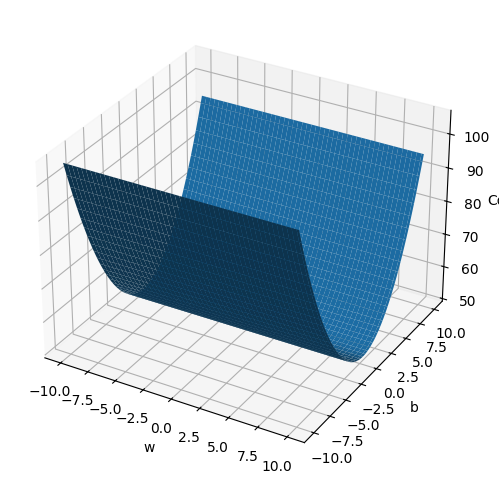

In [20]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(weights_mesh, biases_mesh, losses_mesh)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
plt.show()

# Gradient Descent
- Compute gradients
- Update parameters


In [21]:
def compute_gradient(X, y_true, w, b):
    delta = 1e-9
    cost_1 = cost_function(X, y_true, w, b)
    cost_2 = cost_function(X, y_true, w + delta, b)
    cost_3 = cost_function(X, y_true, w, b + delta)
    dw = (cost_2 - cost_1) / delta
    db = (cost_3 - cost_1) / delta
    return dw, db

In [22]:
""" Compute cost / logits """
loss = cost_function(X, y_true, w, b)
print("Loss:", loss, "Weight:", w, "bias:", b)

Loss: 95.0572008054445 Weight: 10.0 bias: -10.0


In [23]:
dw, db = compute_gradient(X, y_true, w, b)
print("dw:", dw, "db:", db)

dw: 9.446637250221102 db: -9.999993721976352


In [24]:
""" What if dw, db is very large 
We might miss the minima because of overshooting.

So, we only subtract a portion of it
like 0.0001
This value is called learning_rate
"""

lr = 0.001
w = w - lr * dw
b = b - lr * db

In [25]:
for i in range(10000):
    loss = cost_function(X, y_true, w, b)
    if i % 1000:
        print("Loss:", loss, "Weight:", w, "bias:", b)
    dw, db = compute_gradient(X, y_true, w, b)
    w = w - lr * dw
    b = b - lr * db

Loss: 94.67928956080407 Weight: 9.98111613308538 bias: -9.980010002786912
Loss: 94.49089998807855 Weight: 9.97168833942851 bias: -9.97003000373752
Loss: 94.30288661335818 Weight: 9.962269953357463 bias: -9.960059980708138
Loss: 94.11524859013554 Weight: 9.952860974872237 bias: -9.950099905277057
Loss: 93.92798537174454 Weight: 9.943461375551124 bias: -9.940149805865985
Loss: 93.741096239671 Weight: 9.934071183815831 bias: -9.93020963984236
Loss: 93.55458025703328 Weight: 9.924690314401232 bias: -9.920279449838745
Loss: 93.36843695885526 Weight: 9.915318852572454 bias: -9.910359164800866
Loss: 93.1826652624933 Weight: 9.905956727275225 bias: -9.900448798939578
Loss: 92.99726500185062 Weight: 9.896603995352962 bias: -9.890548338044027
Loss: 92.81223496419746 Weight: 9.887260571540537 bias: -9.880657796325067
Loss: 92.62757444675444 Weight: 9.877926470048806 bias: -9.87077714536099
Loss: 92.44328261550896 Weight: 9.868601690877767 bias: -9.860906356730084
Loss: 92.25935893359275 Weight: 9

In [26]:
w, b

(np.float64(0.5364323560807982), np.float64(-0.0004512862206063062))

In [27]:
housing_dataset["price_pred_learned"] = get_house_price(housing_dataset["price"], w, b)
housing_dataset.head()

,area,price,price_pred_rand,price_pred_learned
0,1.045766,4.562174,280.780143,2.446846
1,1.755397,4.000809,401.417465,2.145712
2,2.216196,4.000809,479.753388,2.145712
3,1.082630,3.982096,287.047017,2.135674
4,1.045766,3.551716,280.780143,1.904804


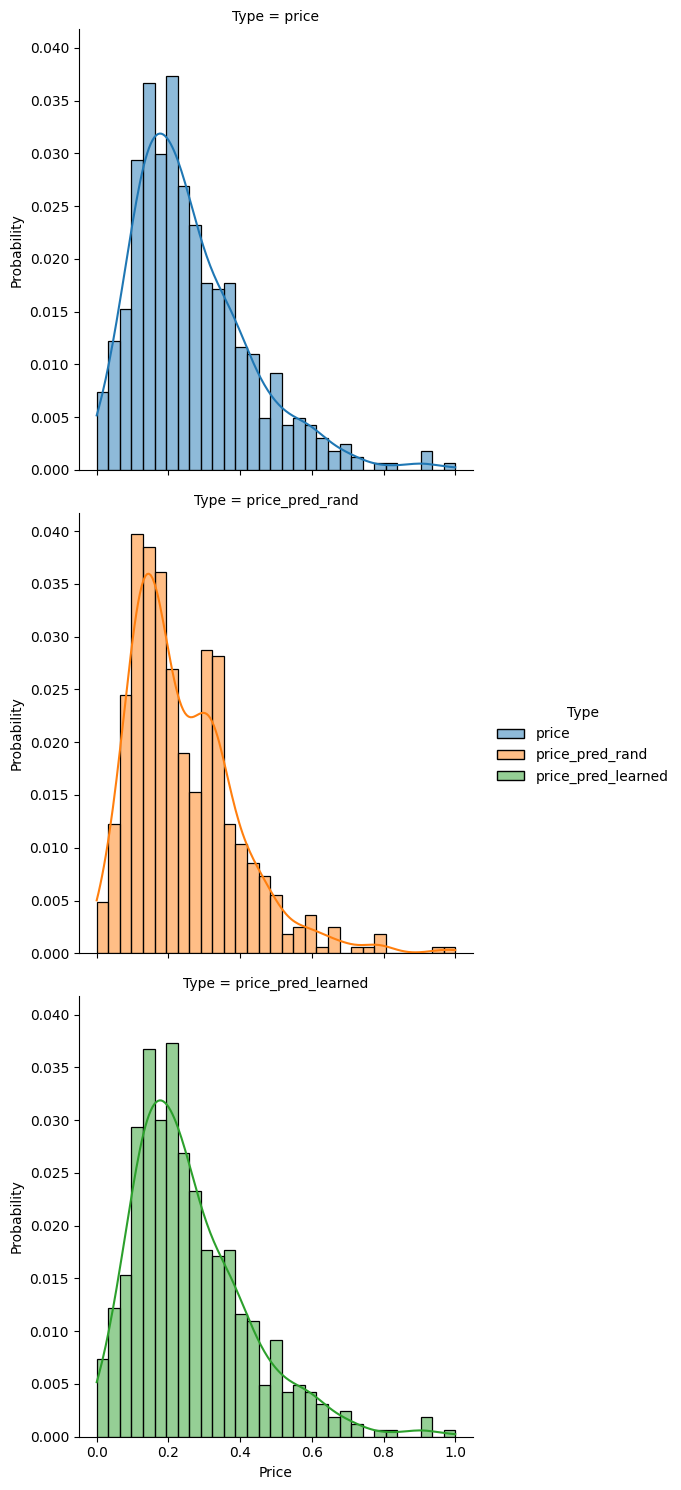

In [28]:
__ = housing_dataset.melt(
    value_vars=["price", "price_pred_rand", "price_pred_learned"], 
    var_name="Type", 
    value_name="Price"
)

__['Price'] = __.groupby('Type')['Price'].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

sns.displot(
    data=__,
    x="Price", 
    hue="Type", 
    kind="hist",
    stat='probability',
    kde=True,
    row='Type',
    fill=True,
)

In [29]:
price_hist, __ = np.histogram(housing_dataset['price'], bins=50, density=True)
price_pred_rand_hist, __ = np.histogram(housing_dataset['price_pred_rand'], bins=50, density=True)
kl_divergence_rand = entropy(price_hist + 1e-10, price_pred_rand_hist + 1e-10)
print(f"KL Divergence before learning is {kl_divergence_rand}")

price_pred_rand_hist, __ = np.histogram(housing_dataset['price_pred_learned'], bins=50, density=True)
kl_divergence_learned = entropy(price_hist + 1e-10, price_pred_rand_hist + 1e-10)
print(f"KL Divergence after learning is {kl_divergence_learned}")

KL Divergence before learning is 0.3737361385463703
KL Divergence after learning is 0.0031113866542548736
